In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-prime-movies-and-tv-shows/amazon_prime_titles.csv


## Importing Visualization Libraries

In [2]:
#importing pyplot and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [3]:
prime=pd.read_csv('/kaggle/input/amazon-prime-movies-and-tv-shows/amazon_prime_titles.csv')

## Getting the general info about the Dataset using head() and tail() 

In [4]:
prime.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...


In [5]:
prime.tail(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."
9667,s9668,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",NaN,NaN,2010,R,103 min,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w..."


## Getting other general info like null values, shape, size, columns of the dataset

In [6]:
prime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [7]:
prime.shape

(9668, 12)

In [8]:
prime.size

116016

In [9]:
prime.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
prime.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

### By the use of **.isnull().sum()** function we can see that we have 2082 null values for ***director***, 1233 null values for ***cast***, 8996 null for ***country***,9513 null values for ***date_added*** and ***rating*** have 337 null values

## As ***date_added*** and ***show_id*** have highest number of null values and doesn't hold much information so let's just drop these columns from the dataset

In [11]:
prime.drop('date_added',axis=1,inplace=True)
prime.drop('show_id',axis=1,inplace=True)

In [12]:
prime.head(2)

,type,title,director,cast,country,release_year,rating,duration,listed_in,description
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...


## For remaining null values, let's replace/fill them with appropriate keyword/values

In [13]:
prime['director'].fillna('Unknown',inplace=True)
prime['cast'].fillna('not mentioned',inplace=True)
prime['country'].fillna('Unknown',inplace=True)
prime['rating'].fillna('unrated',inplace=True)

## Lets check for Null values once again

In [14]:
prime.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## As we can see that there are no null values remaining, we can proceed to next step

# ***Visualization***

## Countplot of content type

In [15]:
prime['type'].value_counts()

Movie      7814
TV Show    1854
Name: type, dtype: int64

<AxesSubplot:title={'center':'Content Distribution as Per the country'}, xlabel='type', ylabel='count'>

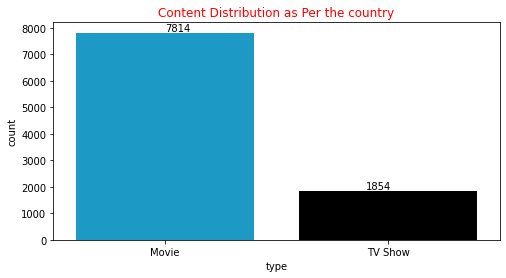

In [16]:
plt.figure(figsize=(8,4))
plt.title('Content Distribution as Per the country',color='red')
plt.annotate('7814',xy=(0.0000001,7875)) #Not The Cleanest way I know
plt.annotate('1854',xy=(0.9,1895)) #Not The Cleanest way I know
sns.countplot(data=prime,x='type',palette=['#00A8E1','black'],dodge=False)

## Top 5 countries as per the content production

In [17]:
countries=prime.set_index('title').country.str.split(',',expand=True).stack().reset_index(level=1,drop=True)
countries=countries[countries!='Unknown']

Text(0.5, 0, 'Country')

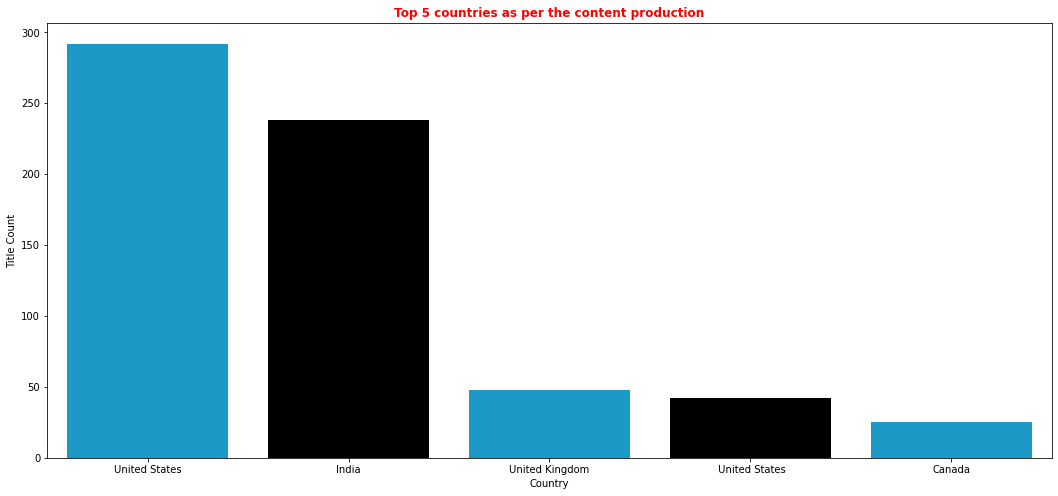

In [18]:
plt.figure(figsize=(18,8))
sns.countplot(x=countries,order=countries.value_counts().index[:5],palette=['#00A8E1','black'])
plt.title('Top 5 countries as per the content production',color='red',weight='bold')
plt.ylabel('Title Count')
plt.xlabel('Country')

## Top 15 Ratings as per the Titles

In [19]:
ratings=prime.set_index('title').rating.str.split(',',expand=True).stack().reset_index(level=1,drop=True)
ratings=ratings[ratings!='unrated']

Text(0.5, 1.0, 'Top 15 ratings as per the Title Count')

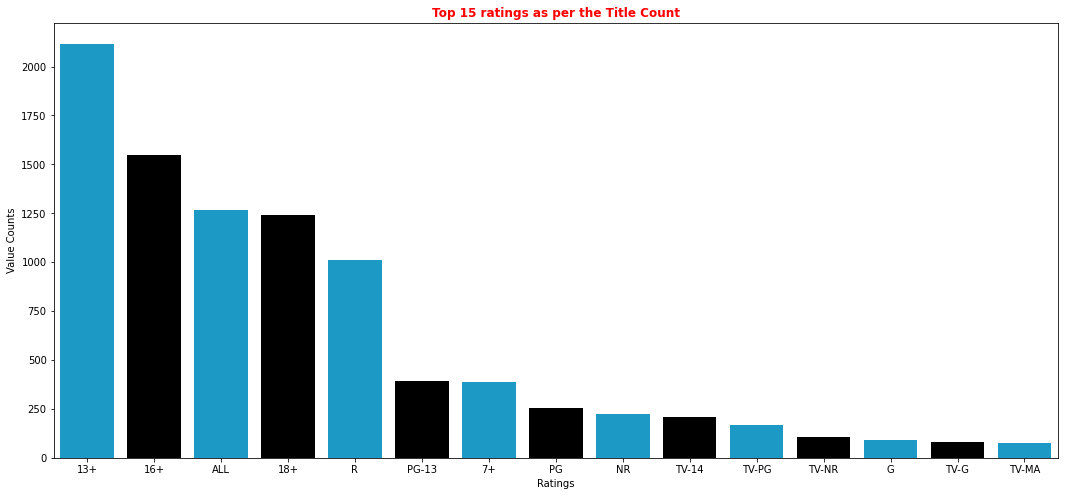

In [20]:
plt.figure(figsize=(18,8))
sns.countplot(x=ratings,order=ratings.value_counts().index[:15],palette=['#00A8E1','black'])
plt.xlabel('Ratings')
plt.ylabel('Value Counts')
plt.title('Top 15 ratings as per the Title Count',color='red',weight='bold')

## Content type distribution as per the ratings

Text(0.5, 1.0, 'Content Type Distribution as per the ratings')

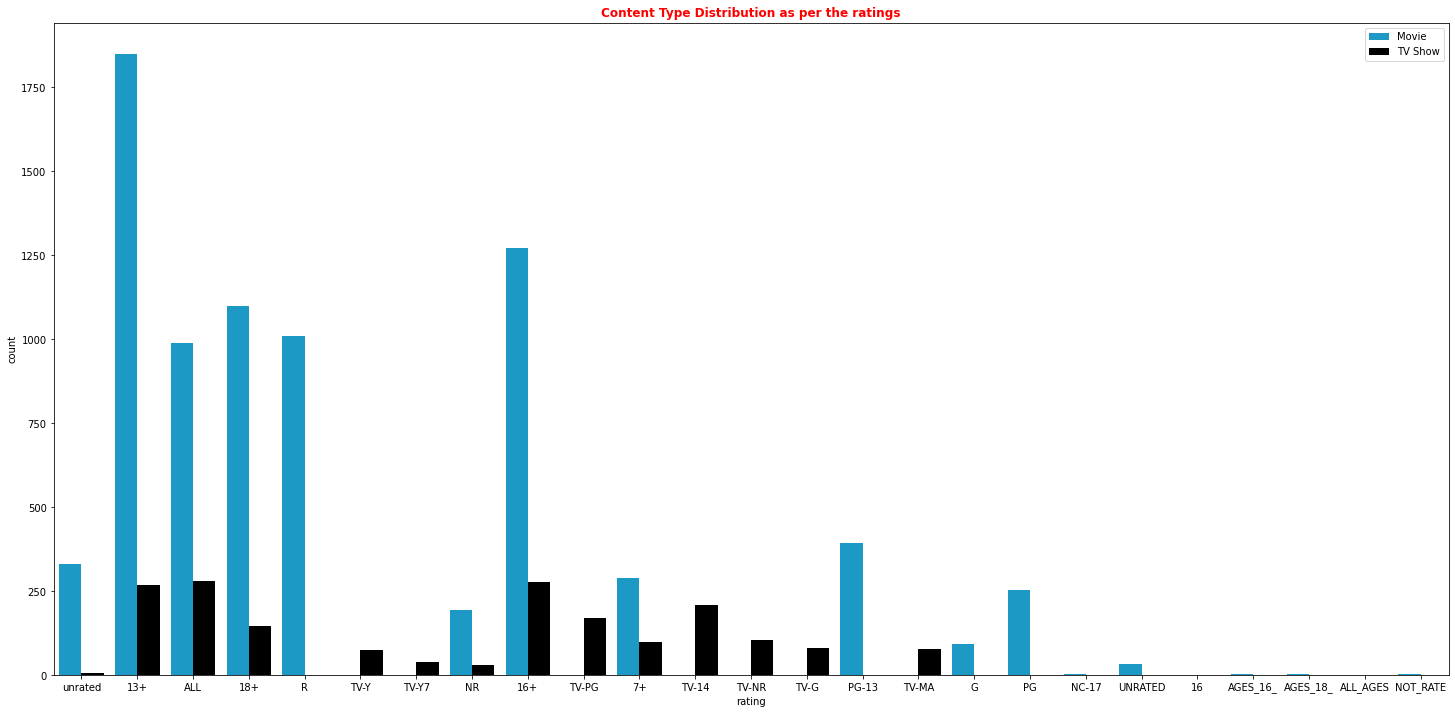

In [21]:
plt.figure(figsize=(25,12))
sns.countplot(x=prime['rating'],hue=prime['type'],palette=['#00A8E1','black'])
plt.legend(loc='upper right')
plt.title('Content Type Distribution as per the ratings',color='red',weight='bold')

# I will keep updating the notebook once I learn More